#This notebook shows the steps of creating machine learning predictive models

Background: One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".
Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.
Machine Learning is helpful to predict if the car purchased at the Auction is a Kick (bad buy).



Import a few tools for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pickle # saving models


In [2]:
!python --version

Python 3.11.4


In [3]:
# The following could be skipped if the raw data files (training.csv and Carvana_Data_Dictionary.txt) are in the same folder with this notebook file
# from google.colab import files
# files.upload()

# Load data

In [4]:
df = pd.read_csv('data/training.csv', parse_dates=["PurchDate"]) # parse_dates=True
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [5]:
test_df = pd.read_csv('data/test.csv',parse_dates=["PurchDate"])
test_df.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,2009-12-02,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,2009-12-02,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,2009-12-02,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,2009-12-02,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,2009-12-02,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [6]:
df.shape

(72983, 34)

In [7]:
df.describe()

,RefId,IsBadBuy,PurchDate,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2010-01-10 02:51:53.590836224,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
min,1.000000,0.000000,2009-01-05 00:00:00,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2009-07-20 00:00:00,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2010-01-21 00:00:00,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2010-07-14 00:00:00,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010-12-30 00:00:00,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000
std,21077.241302,0.328425,NaN,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788


In [8]:
df['MMRAcquisitionAuctionAveragePrice'].median()

6097.0

In [9]:
df['MMRAcquisitionAuctionAveragePrice'].max()


35722.0

In [10]:
df[['VehYear','Make', 'MMRAcquisitionAuctionAveragePrice']].groupby(['VehYear', 'Make']).median()

MMRAcquisitionAuctionAveragePrice
VehYear Make                                        
2001    ACURA                                 4916.0
        BUICK                                 3016.0
        CHEVROLET                             2624.0
        CHRYSLER                              2529.5
        DODGE                                 2588.0
...                                              ...
2009    SATURN                                9184.0
        SCION                                11939.0
        SUBARU                               14864.0
        TOYOTA                               10092.0
2010    FORD                                 13278.0

[238 rows x 1 columns]

# Initial Check

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              72983 non-null  int64         
 1   IsBadBuy                           72983 non-null  int64         
 2   PurchDate                          72983 non-null  datetime64[ns]
 3   Auction                            72983 non-null  object        
 4   VehYear                            72983 non-null  int64         
 5   VehicleAge                         72983 non-null  int64         
 6   Make                               72983 non-null  object        
 7   Model                              72983 non-null  object        
 8   Trim                               70623 non-null  object        
 9   SubModel                           72975 non-null  object        
 10  Color                             

From the DataFrame info, there are three types of features: date (datetime64[ns]), numerical(int64 ad float64) and categorical one with type: object

In [12]:
print("Description about the columns:\n")
des = open('data/Carvana_Data_Dictionary.txt', 'r')
print(des.read())

Description about the columns:

Field Name				Definition
RefID				        Unique (sequential) number assigned to vehicles
IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
PurchDate				The Date the vehicle was Purchased at Auction
Auction					Auction provider at which the  vehicle was purchased
VehYear					The manufacturer's year of the vehicle
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers
MMRAcquisit

#Exploratory Data Analysis

In [13]:
numeric_features = df.select_dtypes(include=np.number).columns.to_list()
print(numeric_features)
print(len(numeric_features))

['RefId', 'IsBadBuy', 'VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']
19


first let us get these numeric features and drop RefID and BYTNO (won't affect modeling). 

In [14]:
print(type(df.select_dtypes(include =['float64', 'int64']).columns.to_list()))

<class 'list'>


In [15]:
num_features = df.select_dtypes(include =['float64', 'int64']).columns.drop(['RefId','BYRNO']) #inplace is not set yet for drop
print(num_features)
print(len(num_features))

Index(['IsBadBuy', 'VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VNZIP1',
       'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')
17


# Then categorical features

In [16]:

columns = df.columns.to_list()
cat_columns = list(set(columns) - set(numeric_features))
print (cat_columns)

print(len(cat_columns))


['Color', 'Transmission', 'PRIMEUNIT', 'Make', 'WheelType', 'Trim', 'Nationality', 'AUCGUART', 'SubModel', 'PurchDate', 'VNST', 'Size', 'Auction', 'Model', 'TopThreeAmericanName']
15


In [17]:

cat_features = df.select_dtypes(include=['object', 'datetime64[ns]']).columns 
print(cat_features)
print(len(cat_features))


Index(['PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color',
       'Transmission', 'WheelType', 'Nationality', 'Size',
       'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST'],
      dtype='object')
15


array([[<Axes: title={'center': 'MMRAcquisitionAuctionCleanPrice'}>,
        <Axes: title={'center': 'MMRAcquisitionRetailAveragePrice'}>]],
      dtype=object)

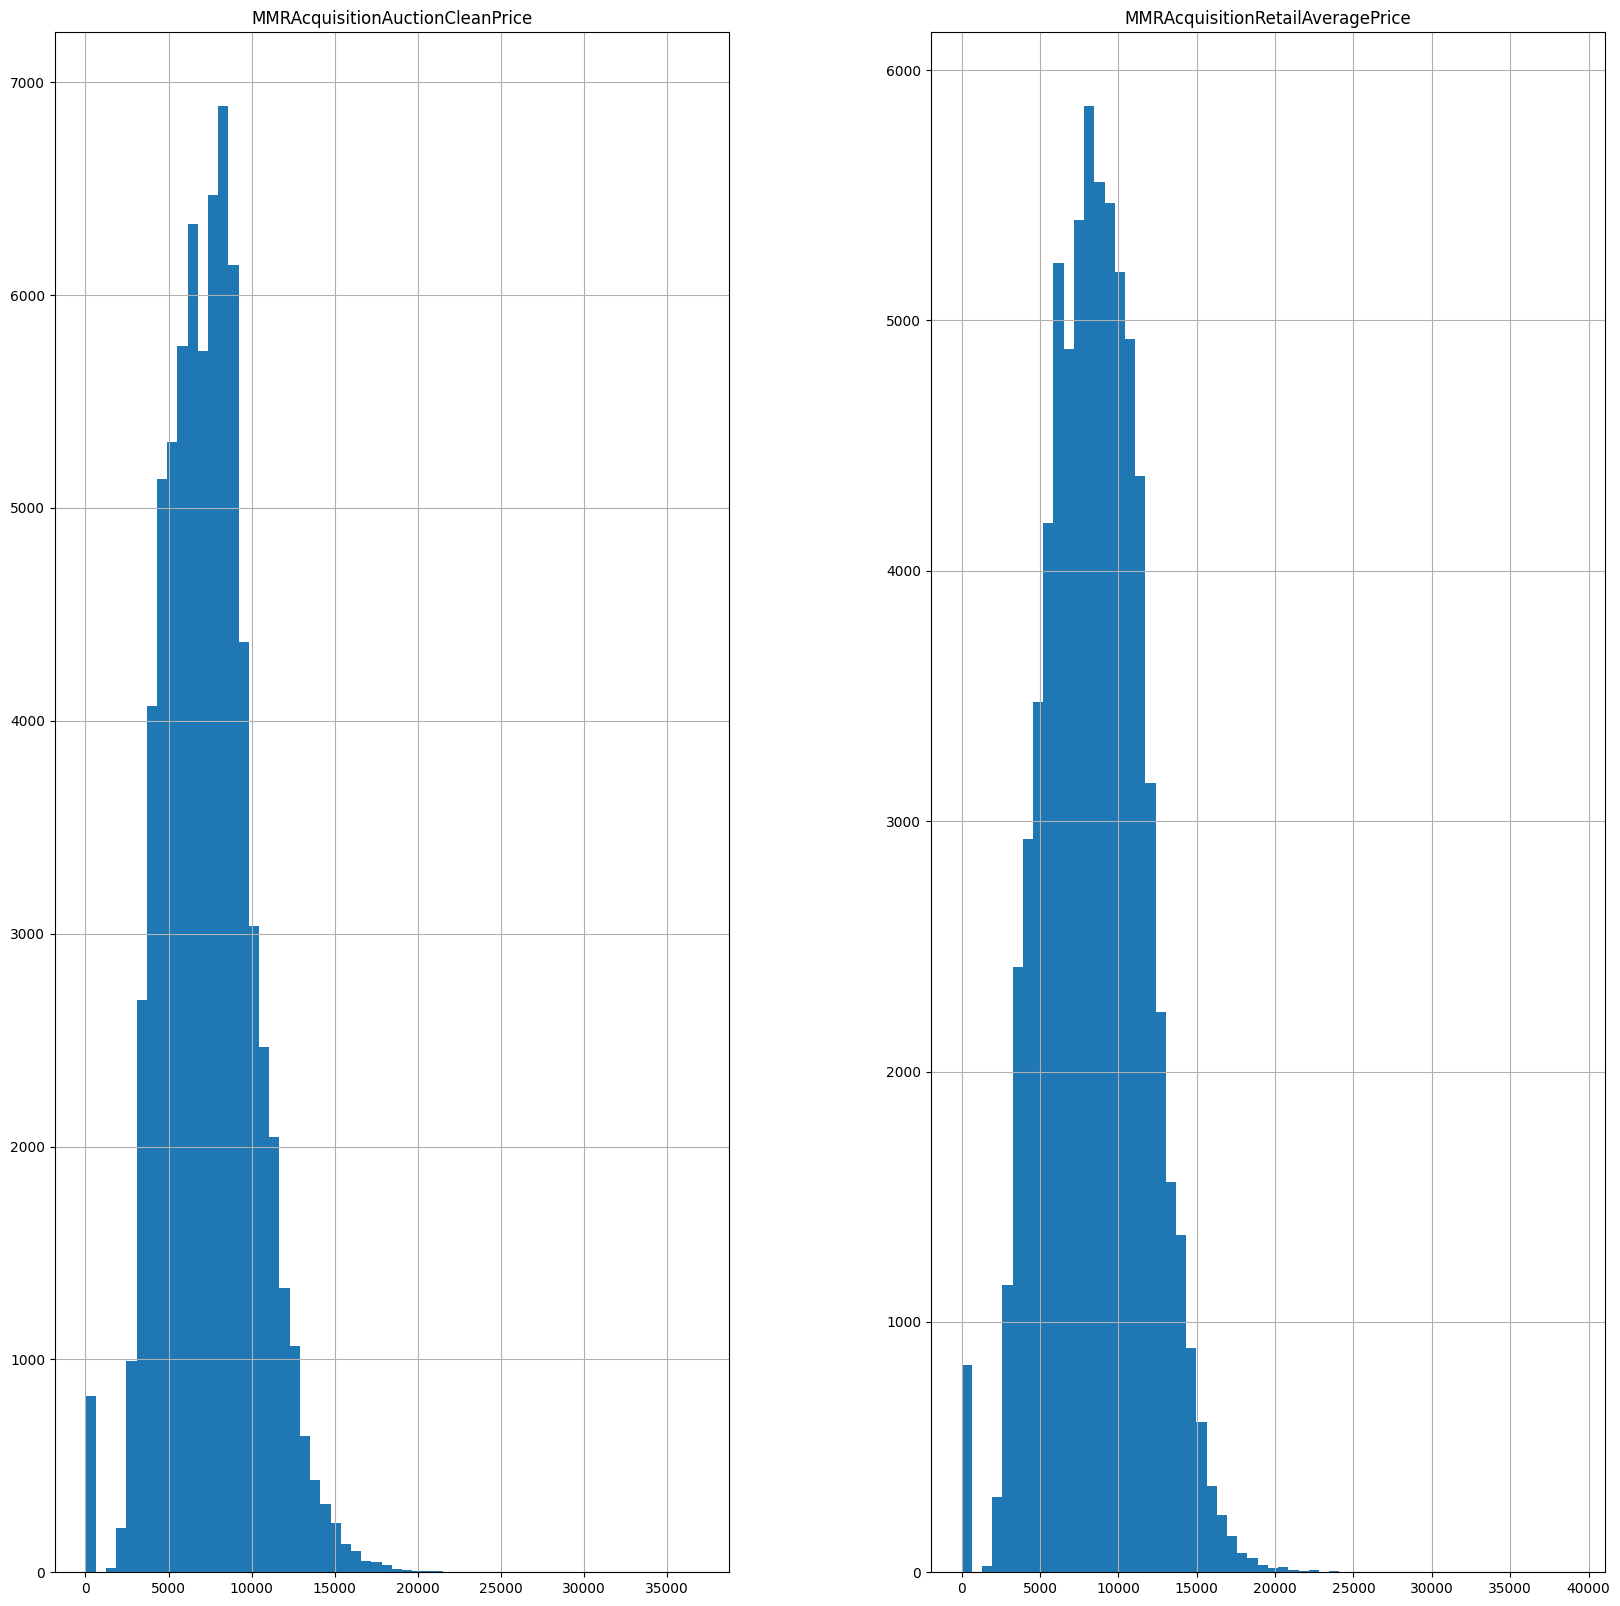

In [18]:
# df['MMRAcquisitionAuctionAveragePrice'].hist(bins=40, range=(0,15000))
df[num_features[6:8]].hist(figsize=(20,20), bins=60)

(array([1.1541e+04, 3.6435e+04, 2.2498e+04, 2.2760e+03, 1.8000e+02,
        2.2000e+01, 5.0000e+00, 4.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([    0. ,  3572.2,  7144.4, 10716.6, 14288.8, 17861. , 21433.2,
        25005.4, 28577.6, 32149.8, 35722. ]),
 <BarContainer object of 10 artists>)

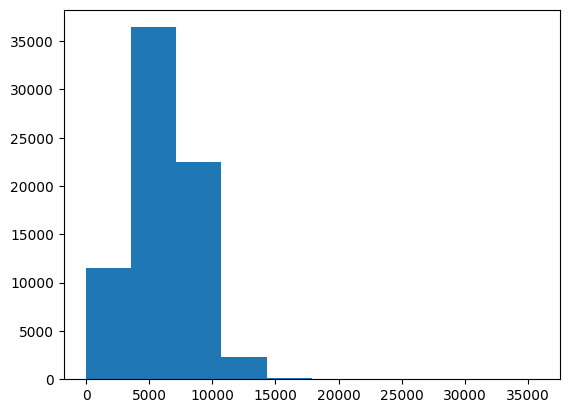

In [19]:
plt.hist(df['MMRAcquisitionAuctionAveragePrice']) # not as good as df['MMRAcquisitionAuctionAveragePrice'].hist()

In [20]:
dates = df['PurchDate']
print(dates.dtype)
print(min(dates), max(dates), len(set(dates)))

datetime64[ns]
2009-01-05 00:00:00 2010-12-30 00:00:00 517


array([[<Axes: title={'center': 'IsBadBuy'}>,
        <Axes: title={'center': 'VehYear'}>,
        <Axes: title={'center': 'VehicleAge'}>,
        <Axes: title={'center': 'WheelTypeID'}>],
       [<Axes: title={'center': 'VehOdo'}>,
        <Axes: title={'center': 'MMRAcquisitionAuctionAveragePrice'}>,
        <Axes: title={'center': 'MMRAcquisitionAuctionCleanPrice'}>,
        <Axes: title={'center': 'MMRAcquisitionRetailAveragePrice'}>],
       [<Axes: title={'center': 'MMRAcquisitonRetailCleanPrice'}>,
        <Axes: title={'center': 'MMRCurrentAuctionAveragePrice'}>,
        <Axes: title={'center': 'MMRCurrentAuctionCleanPrice'}>,
        <Axes: title={'center': 'MMRCurrentRetailAveragePrice'}>],
       [<Axes: title={'center': 'MMRCurrentRetailCleanPrice'}>,
        <Axes: title={'center': 'VNZIP1'}>,
        <Axes: title={'center': 'VehBCost'}>,
        <Axes: title={'center': 'IsOnlineSale'}>],
       [<Axes: title={'center': 'WarrantyCost'}>, <Axes: >, <Axes: >,
        <Axes: 

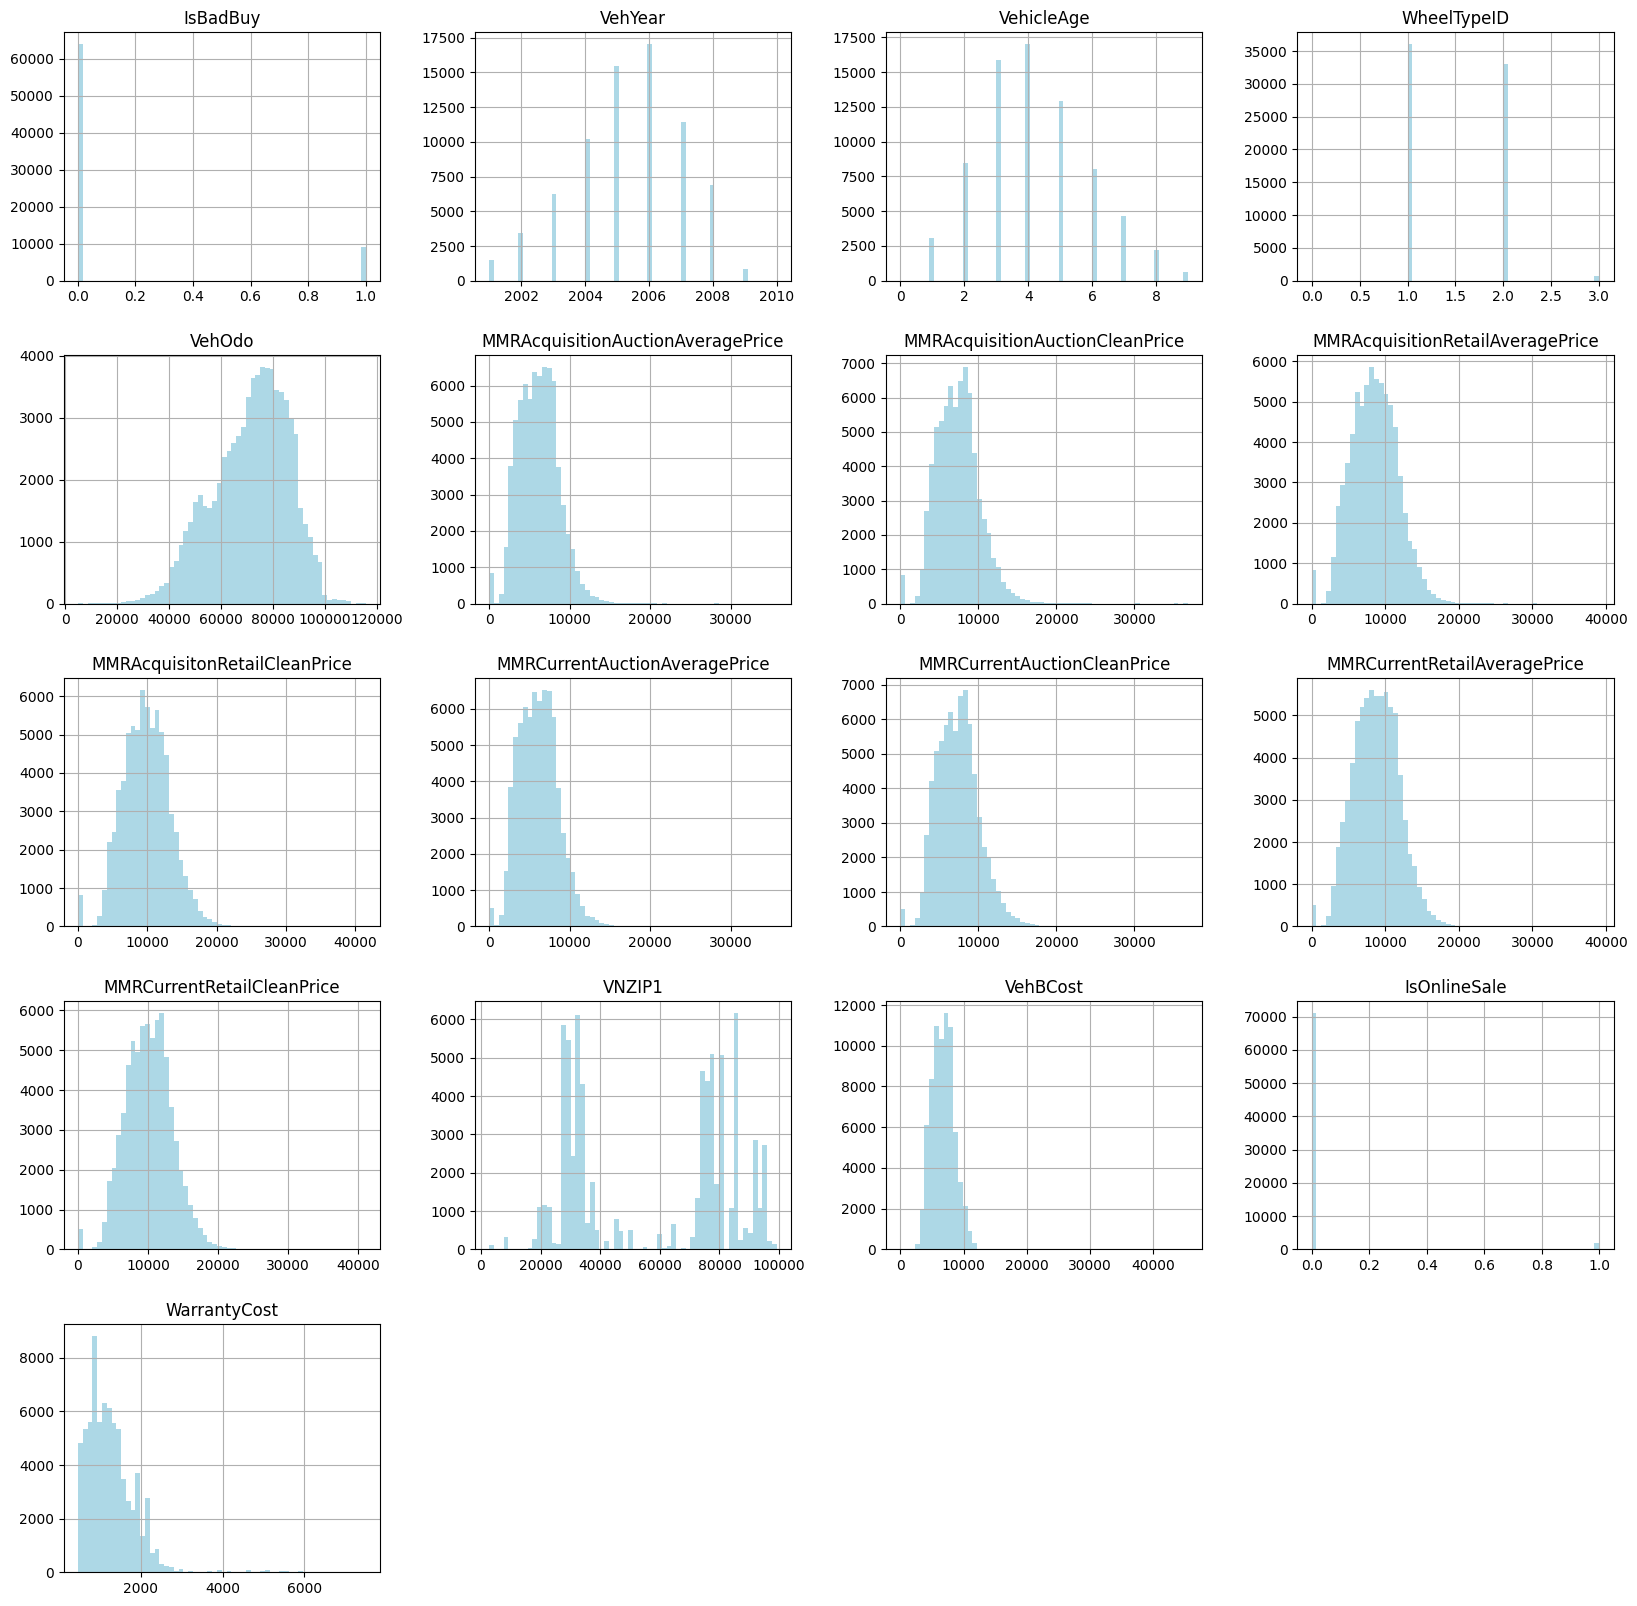

In [21]:
df[num_features].hist(figsize =(20,20),color='lightblue', bins =60)

In [22]:
# correlation coefficients between numeric features
df[num_features].corr()

,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
IsBadBuy,1.000000,-0.158886,0.167164,-0.044620,0.082560,-0.109252,-0.102954,-0.087418,-0.083665,-0.109112,-0.104020,-0.103914,-0.100245,0.005796,-0.099911,-0.003697,0.052319
VehYear,-0.158886,1.000000,-0.957957,0.259660,-0.283719,0.581146,0.532927,0.581191,0.539230,0.590820,0.548426,0.598490,0.558669,0.068276,0.349965,0.057380,-0.268696
VehicleAge,0.167164,-0.957957,1.000000,-0.250801,0.319794,-0.565690,-0.518810,-0.460854,-0.426382,-0.575607,-0.532505,-0.504062,-0.469359,-0.074857,-0.312329,-0.024771,0.259310
WheelTypeID,-0.044620,0.259660,-0.250801,1.000000,-0.213558,-0.095471,-0.129597,-0.072700,-0.102019,-0.088597,-0.121211,-0.074420,-0.102488,0.007901,-0.162826,-0.006747,-0.132798
VehOdo,0.082560,-0.283719,0.319794,-0.213558,1.000000,-0.017022,0.024617,0.031306,0.063165,-0.028568,0.012107,0.015811,0.048005,-0.053041,-0.062008,0.029556,0.411718
MMRAcquisitionAuctionAveragePrice,-0.109252,0.581146,-0.565690,-0.095471,-0.017022,1.000000,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755,0.871042,0.045694,0.789840,0.038818,-0.050417
MMRAcquisitionAuctionCleanPrice,-0.102954,0.532927,-0.518810,-0.129597,0.024617,0.990347,1.000000,0.902718,0.918242,0.923610,0.932114,0.860716,0.871203,0.040675,0.781516,0.038667,-0.020644
MMRAcquisitionRetailAveragePrice,-0.087418,0.581191,-0.460854,-0.072700,0.031306,0.910391,0.902718,1.000000,0.990201,0.851647,0.849407,0.913108,0.906054,0.035489,0.746126,0.080627,-0.053444
MMRAcquisitonRetailCleanPrice,-0.083665,0.539230,-0.426382,-0.102019,0.063165,0.910187,0.918242,0.990201,1.000000,0.846914,0.855689,0.903188,0.906810,0.031284,0.744966,0.077670,-0.026933
MMRCurrentAuctionAveragePrice,-0.109112,0.590820,-0.575607,-0.088597,-0.028568,0.937817,0.923610,0.851647,0.846914,1.000000,0.990329,0.915073,0.912231,0.048965,0.778738,0.039876,-0.056798


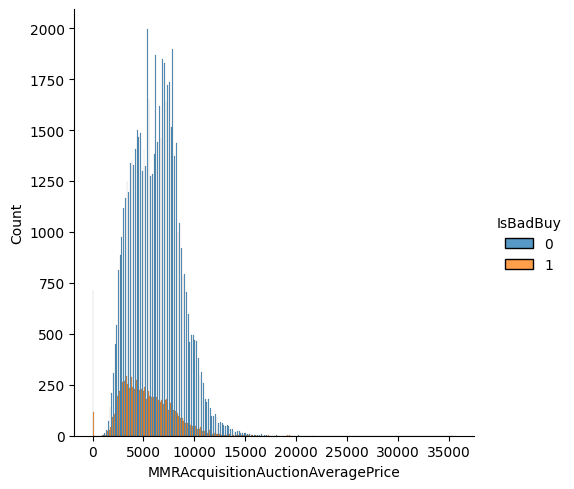

In [23]:
sns.displot(df, x="MMRAcquisitionAuctionAveragePrice", hue="IsBadBuy", multiple="dodge")

<Axes: >

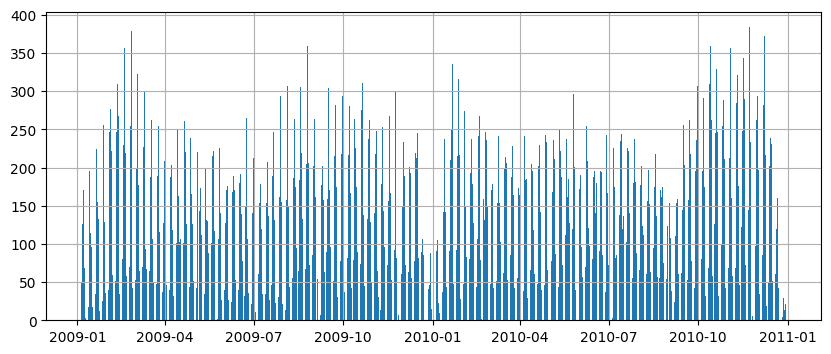

In [24]:
df['PurchDate'].hist(figsize=(10,4),bins=730)

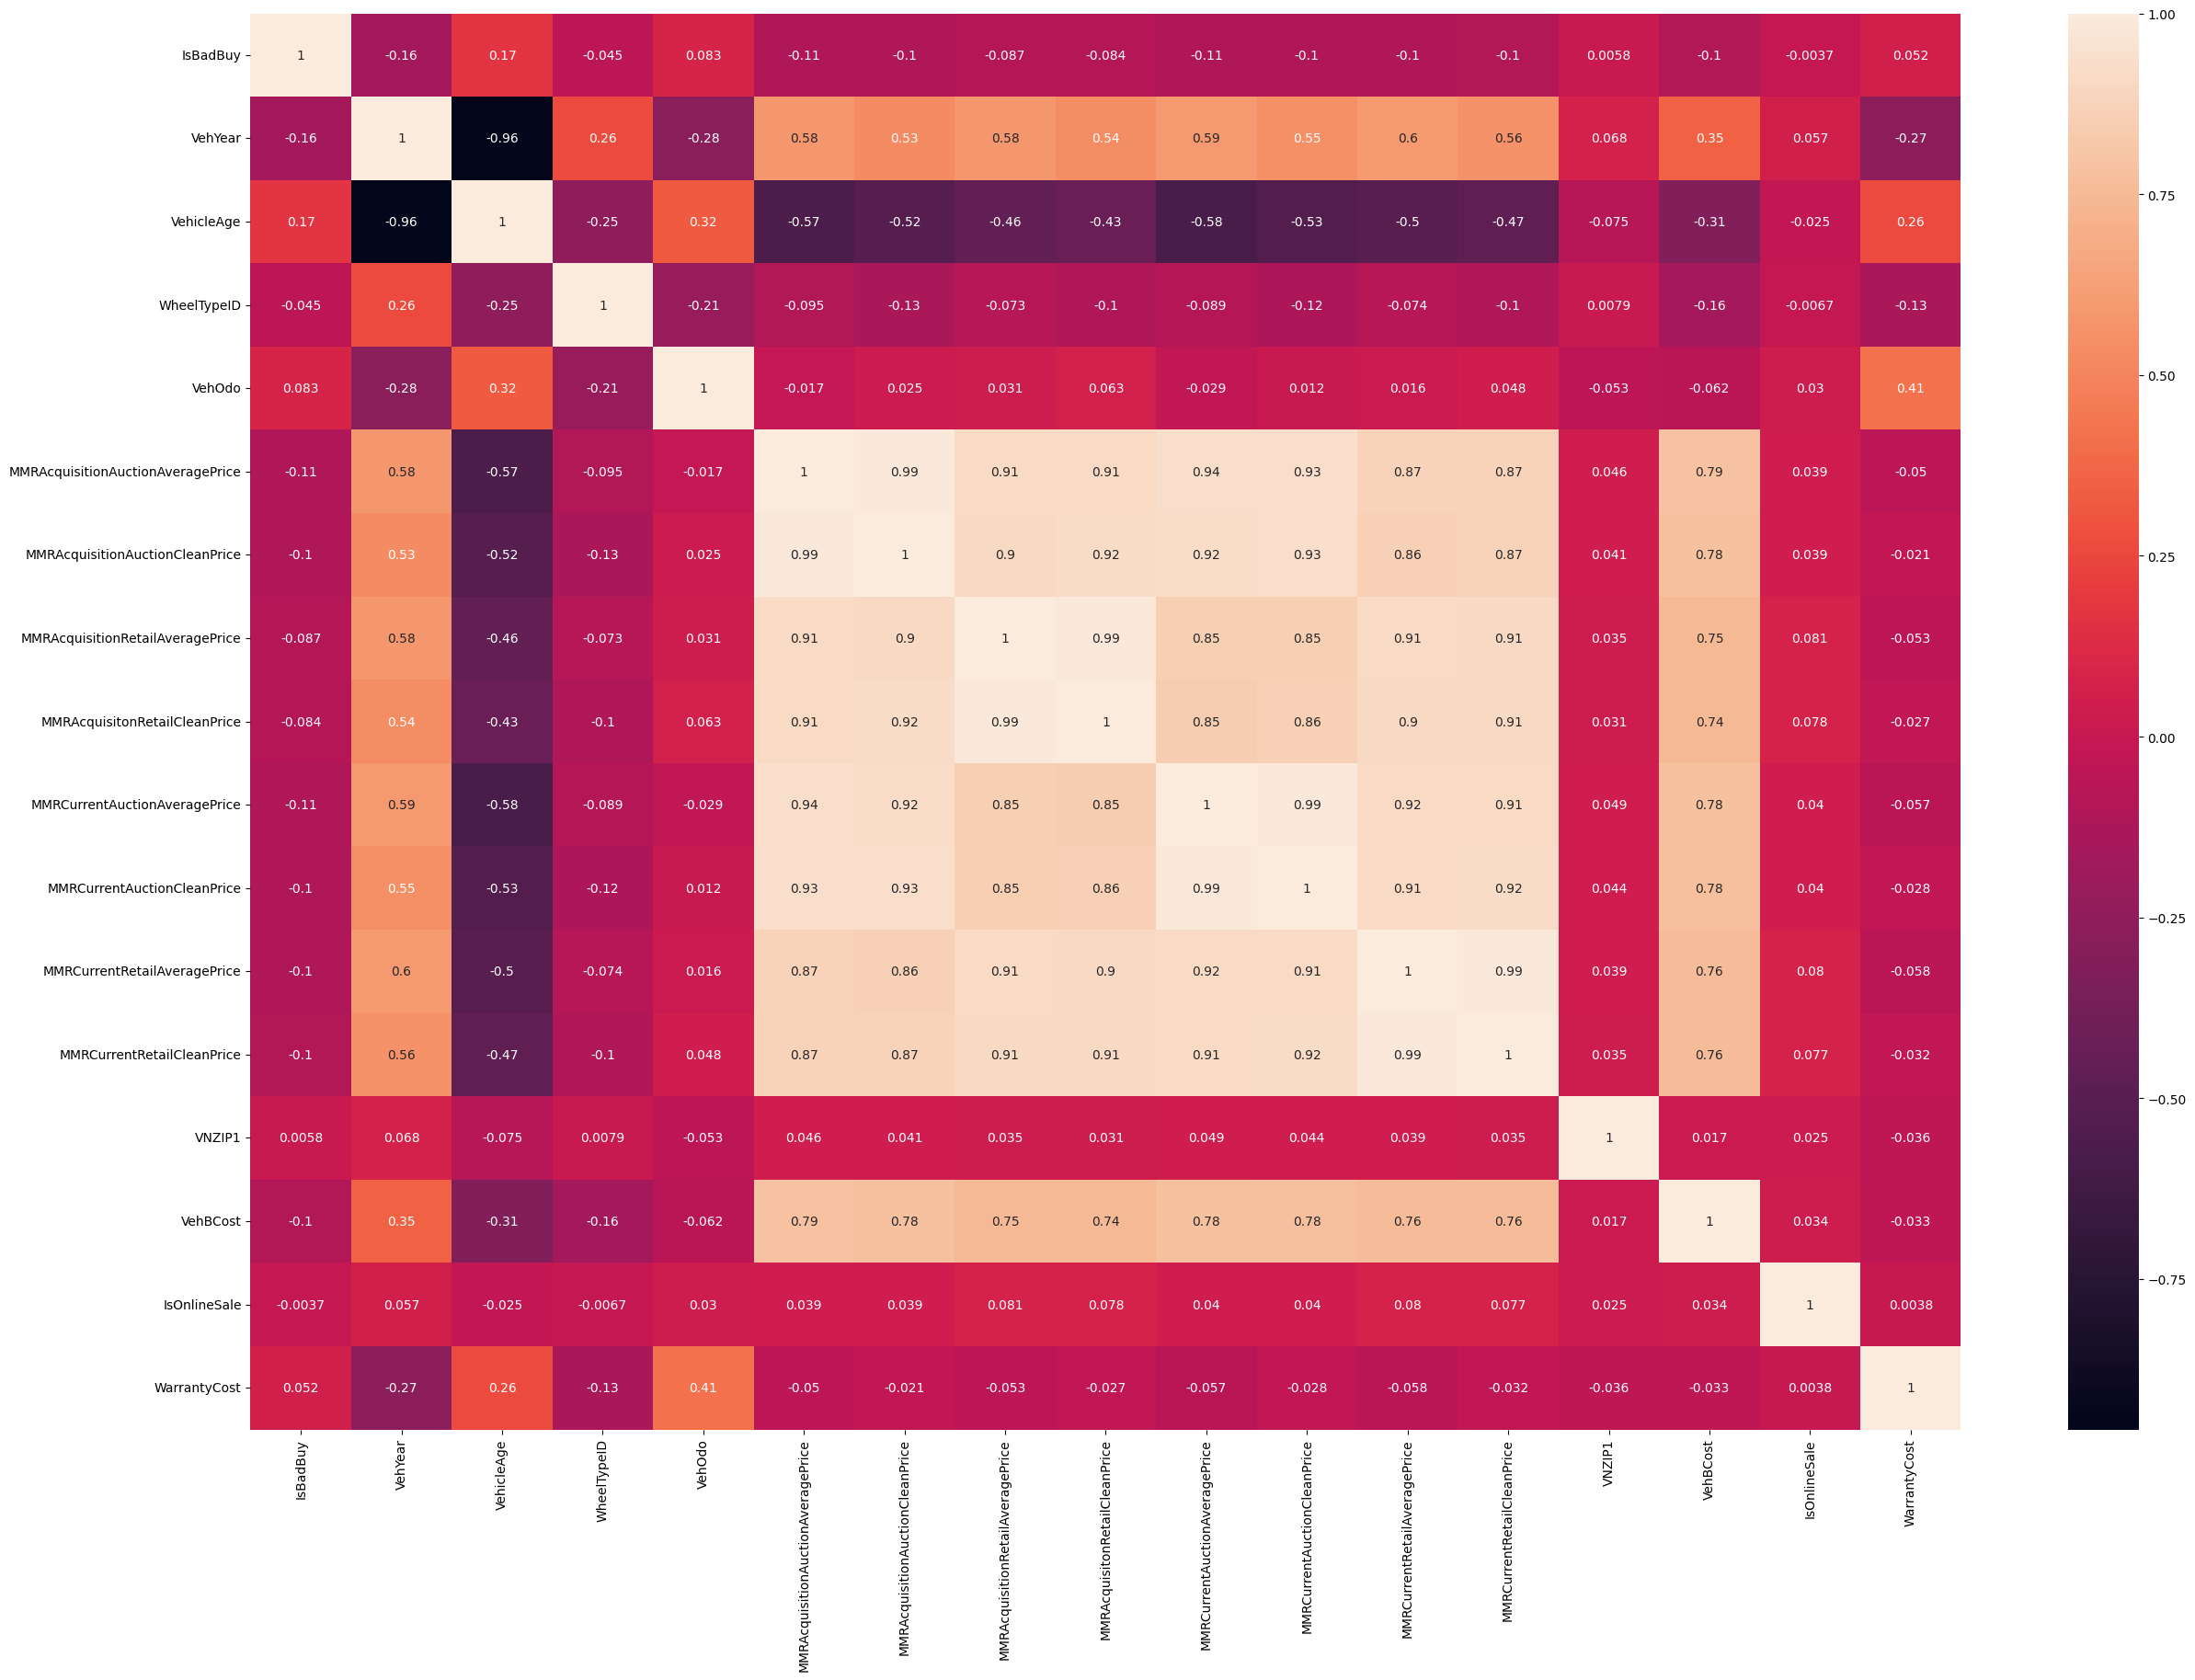

In [25]:
fig, ax = plt.subplots(figsize=(30, 20))
dataplot = sns.heatmap(df[num_features].corr(), annot=True)
# plt.subplots(figsize=(30, 20))
# dataplot = sns.heatmap(df[num_features].corr(), cmap="YlGnBu", annot=True)

#About purchase date
It looks making more sense to consider day of week based on the following analysis

In [26]:
import datetime as dt
def get_day(df):
    df['date1'] = pd.to_datetime(df['PurchDate'])
    df['dow']=df['date1'].dt.day_name()  # 
    return (df)
df = get_day(df)
del df['date1']
print(df) # see the last column


       RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
0          1         0 2009-12-07   ADESA     2006           3      MAZDA   
1          2         0 2009-12-07   ADESA     2004           5      DODGE   
2          3         0 2009-12-07   ADESA     2005           4      DODGE   
3          4         0 2009-12-07   ADESA     2004           5      DODGE   
4          5         0 2009-12-07   ADESA     2005           4       FORD   
...      ...       ...        ...     ...      ...         ...        ...   
72978  73010         1 2009-12-02   ADESA     2001           8    MERCURY   
72979  73011         0 2009-12-02   ADESA     2007           2  CHEVROLET   
72980  73012         0 2009-12-02   ADESA     2005           4       JEEP   
72981  73013         0 2009-12-02   ADESA     2006           3  CHEVROLET   
72982  73014         0 2009-12-02   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel  ...  \
0              

<Axes: >

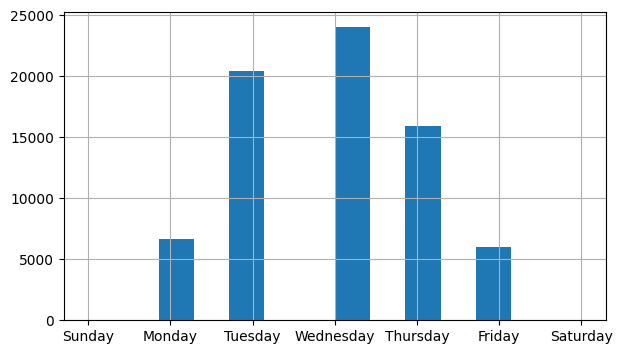

In [27]:
# Define the order of weekdays
cats = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['dow'] = pd.Categorical(df['dow'], categories=cats, ordered=True)
df = df.sort_values('dow') 
df['dow'].hist(figsize=(7,4),bins=14)

Seaborn is a powerful visualization tool to explore the correlations among features. Distributions of all price related columns look similar, they might be correlated.

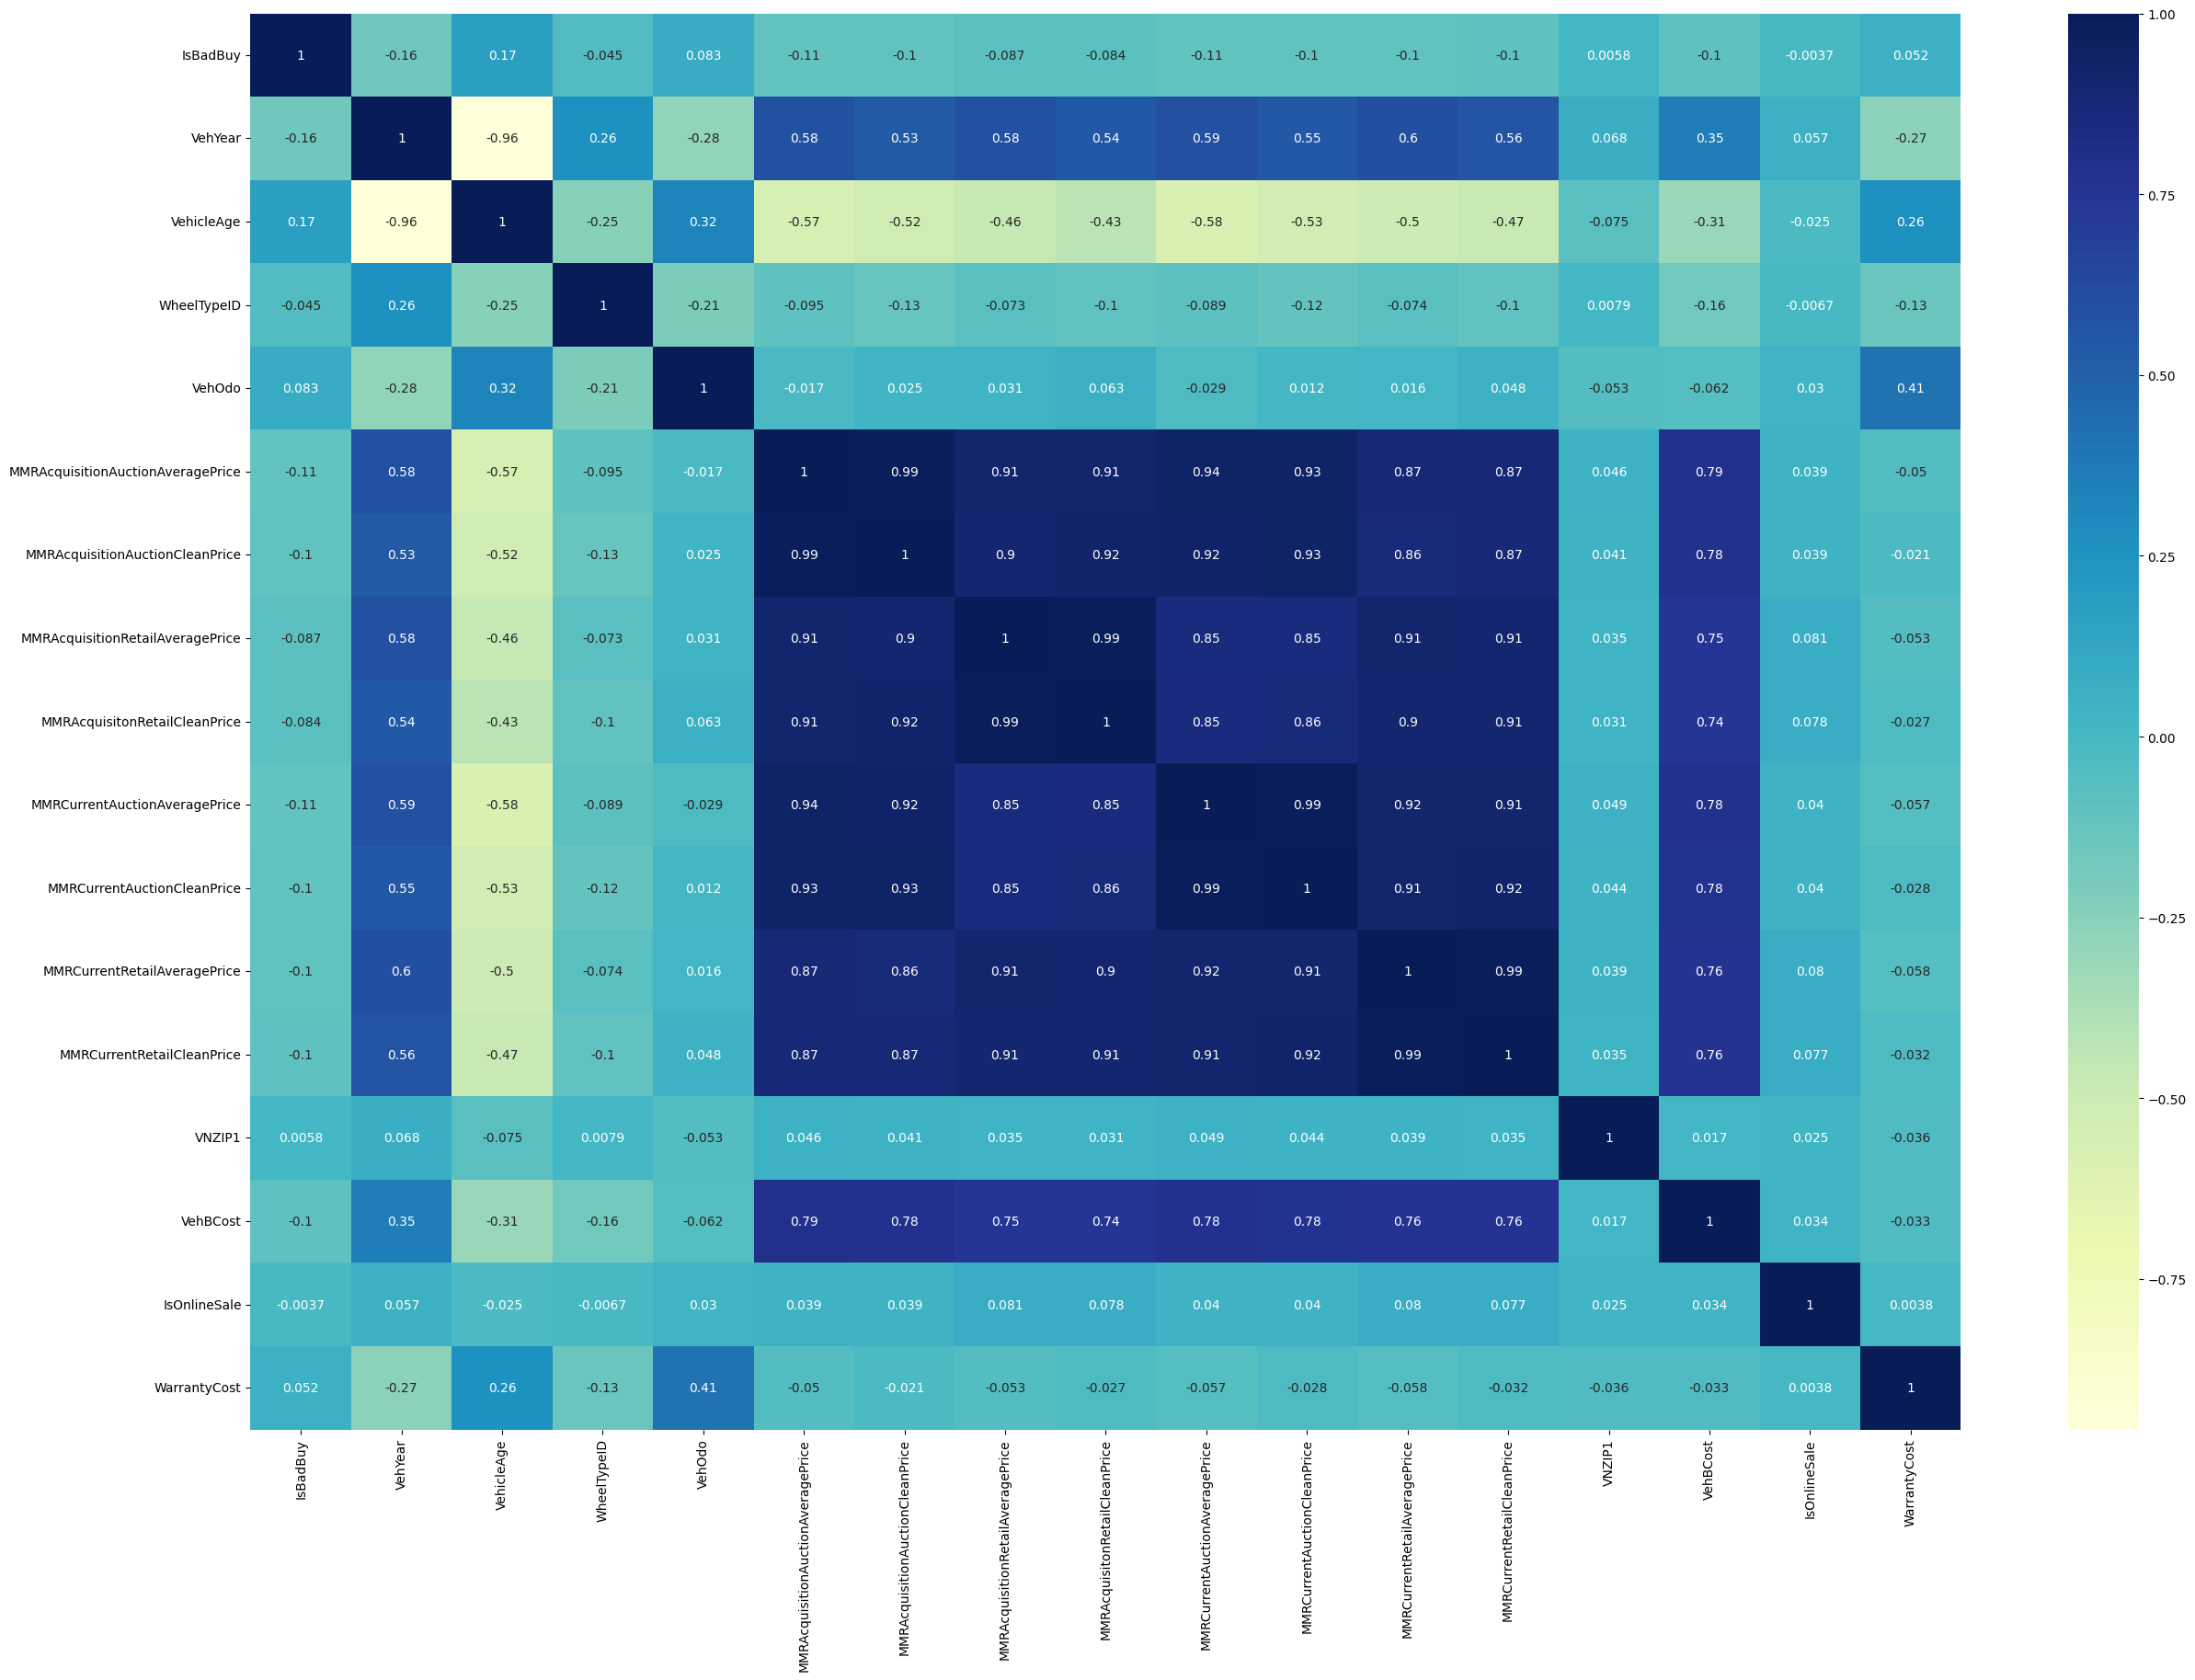

In [28]:
fig, ax = plt.subplots(figsize=(30, 20))
dataplot = sns.heatmap(df[num_features].corr(), cmap="YlGnBu", annot=True)

Obviously now, the price columns are highly correlated. It would be good to pick one of them for modeling purposes

In [29]:
#Pandas is powerful in many ways. Let us see data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72983 entries, 35223 to 53088
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              72983 non-null  int64         
 1   IsBadBuy                           72983 non-null  int64         
 2   PurchDate                          72983 non-null  datetime64[ns]
 3   Auction                            72983 non-null  object        
 4   VehYear                            72983 non-null  int64         
 5   VehicleAge                         72983 non-null  int64         
 6   Make                               72983 non-null  object        
 7   Model                              72983 non-null  object        
 8   Trim                               70623 non-null  object        
 9   SubModel                           72975 non-null  object        
 10  Color                              

Now we include the day of week (dow) instead of the purchase date

In [30]:
cat_features = df.select_dtypes(include =['object']).columns
print(cat_features)
df[cat_features].describe()

Index(['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT',
       'AUCGUART', 'VNST'],
      dtype='object')


,Auction,Make,Model,Trim,SubModel,Color,Transmission,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,VNST
count,72983,72983,72983,70623,72975,72975,72974,69809,72978,72978,72978,3419,3419,72983
unique,3,33,1063,134,863,16,3,3,4,12,4,2,2,37
top,MANHEIM,CHEVROLET,PT CRUISER,Bas,4D SEDAN,SILVER,AUTO,Alloy,AMERICAN,MEDIUM,GM,NO,GREEN,TX
freq,41043,17248,2329,13950,15236,14875,70398,36050,61028,30785,25314,3357,3340,13596


In [31]:
df[num_features].describe()

,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,58043.059945,6730.934326,0.025280,1276.580985
std,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,26151.640415,1767.846435,0.156975,598.846788
min,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2764.000000,1.000000,0.000000,462.000000
25%,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,32124.000000,5435.000000,0.000000,837.000000
50%,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,80022.000000,7900.000000,0.000000,1623.000000
max,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99224.000000,45469.000000,1.000000,7498.000000


In [32]:
df.describe()


,RefId,IsBadBuy,PurchDate,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2010-01-10 02:51:53.590836224,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
min,1.000000,0.000000,2009-01-05 00:00:00,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2009-07-20 00:00:00,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2010-01-21 00:00:00,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2010-07-14 00:00:00,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010-12-30 00:00:00,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000
std,21077.241302,0.328425,NaN,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788


# Select features
remove the following features for some reason:
1.   WheelTypeID: redundant
2.   RefID, BYRNO: just IDs
3.   MMRCurrentAuctionCleanPrice: high correlated with MMRCurrentAuctionAveragePrice
4.   MMRCurrentRetailCleanPrice: high correlated with MMRCurrentAuctionAveragePrice
5.   MMRAcquisitionAuctionCleanPrice: high correlated with MMRCurrentAuctionAveragePrice
6. MMRAcquisitonRetailCleanPrice MMRAcquisitonRetailCleanPrice MMRAcquisitionRetailAveragePrice MMRCurrentAuctionAveragePrice MMRCurrentRetailAveragePrice: all high correlated with MMRCurrentAuctionAveragePrice
7. VehYear: high correlated with 'VehicleAge'
8. VNZIP1: too many options
9. PurchDate: replaced with day of the week
10. Make: too many options
11. Model: too many options
12. SubModel: too many options
13. Trim: too many options
14. VNST: too many options
15. Color: too many options



In [33]:
col_2_drop_ = "RefId BYRNO WheelTypeID MMRCurrentAuctionCleanPrice MMRCurrentRetailCleanPrice MMRAcquisitionAuctionCleanPrice \
MMRAcquisitonRetailCleanPrice MMRAcquisitionRetailAveragePrice MMRCurrentAuctionAveragePrice MMRCurrentRetailAveragePrice \
VehYear VNZIP1 PurchDate Make Model SubModel Trim VNST Color"
col_2_drop = col_2_drop_.split()
col_2_drop
#test_df

['RefId',
 'BYRNO',
 'WheelTypeID',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailCleanPrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentRetailAveragePrice',
 'VehYear',
 'VNZIP1',
 'PurchDate',
 'Make',
 'Model',
 'SubModel',
 'Trim',
 'VNST',
 'Color']

In [34]:
df.drop(col_2_drop, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72983 entries, 35223 to 53088
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   IsBadBuy                           72983 non-null  int64   
 1   Auction                            72983 non-null  object  
 2   VehicleAge                         72983 non-null  int64   
 3   Transmission                       72974 non-null  object  
 4   WheelType                          69809 non-null  object  
 5   VehOdo                             72983 non-null  int64   
 6   Nationality                        72978 non-null  object  
 7   Size                               72978 non-null  object  
 8   TopThreeAmericanName               72978 non-null  object  
 9   MMRAcquisitionAuctionAveragePrice  72965 non-null  float64 
 10  PRIMEUNIT                          3419 non-null   object  
 11  AUCGUART                           3419 no

In [35]:
cat_features = df.select_dtypes(include=['object', 'category']).columns
print(cat_features)
df[cat_features].describe()

Index(['Auction', 'Transmission', 'WheelType', 'Nationality', 'Size',
       'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'dow'],
      dtype='object')


,Auction,Transmission,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,dow
count,72983,72974,69809,72978,72978,72978,3419,3419,72983
unique,3,3,3,4,12,4,2,2,7
top,MANHEIM,AUTO,Alloy,AMERICAN,MEDIUM,GM,NO,GREEN,Wednesday
freq,41043,70398,36050,61028,30785,25314,3357,3340,24029


In [36]:
df

,IsBadBuy,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost,dow
35223,0,OTHER,2,AUTO,Covers,57376,AMERICAN,MEDIUM,CHRYSLER,5468.0,NaN,NaN,5300.0,0,1086,Sunday
35234,0,OTHER,2,AUTO,Covers,59096,AMERICAN,MEDIUM,CHRYSLER,5468.0,NaN,NaN,5300.0,0,1086,Sunday
35233,0,OTHER,2,AUTO,Covers,60178,AMERICAN,MEDIUM,CHRYSLER,5468.0,NaN,NaN,5200.0,0,1215,Sunday
35232,0,OTHER,2,AUTO,Covers,59349,AMERICAN,MEDIUM,CHRYSLER,5468.0,NaN,NaN,5300.0,0,1086,Sunday
35231,1,OTHER,2,AUTO,Covers,57894,AMERICAN,MEDIUM,CHRYSLER,5468.0,NaN,NaN,5300.0,0,1086,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48111,0,MANHEIM,2,AUTO,Covers,74216,AMERICAN,VAN,GM,6487.0,NaN,NaN,6665.0,0,2091,Friday
48118,0,MANHEIM,3,AUTO,Alloy,81059,AMERICAN,MEDIUM,GM,7588.0,NaN,NaN,7485.0,0,1373,Friday
51700,0,MANHEIM,2,AUTO,Covers,37524,TOP LINE ASIAN,COMPACT,OTHER,8625.0,NaN,NaN,8700.0,1,462,Saturday
51701,0,MANHEIM,2,AUTO,Covers,38270,TOP LINE ASIAN,COMPACT,OTHER,8625.0,NaN,NaN,8600.0,1,462,Saturday


In [37]:
df.describe()

,IsBadBuy,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72965.000000,72983.000000,72983.000000,72983.000000
mean,0.122988,4.176644,71499.995917,6128.909217,6730.934326,0.025280,1276.580985
std,0.328425,1.712210,14578.913128,2461.992768,1767.846435,0.156975,598.846788
min,0.000000,0.000000,4825.000000,0.000000,1.000000,0.000000,462.000000
25%,0.000000,3.000000,61837.000000,4273.000000,5435.000000,0.000000,837.000000
50%,0.000000,4.000000,73361.000000,6097.000000,6700.000000,0.000000,1155.000000
75%,0.000000,5.000000,82436.000000,7765.000000,7900.000000,0.000000,1623.000000
max,1.000000,9.000000,115717.000000,35722.000000,45469.000000,1.000000,7498.000000


# Split data into target (dependent variable) y_data and independent variables X_data

In [38]:
df.drop('dow', axis=1, inplace=True) # simplify to finish exercise on 4/2/2024

In [39]:
y_data= df['IsBadBuy']
X_data= df.drop(['IsBadBuy'], axis=1, inplace=True)


#check missing values

In [40]:
# List number of nulls in each feature
df.isnull().sum()

Auction                                  0
VehicleAge                               0
Transmission                             9
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
PRIMEUNIT                            69564
AUCGUART                             69564
VehBCost                                 0
IsOnlineSale                             0
WarrantyCost                             0
dtype: int64

Deal with missing values separately with numerical and categorical columns

In [41]:
num_features = df.select_dtypes(include =['float64', 'int64']).columns.tolist()
print(num_features)

cat_features = df.select_dtypes(include =['object']).columns.tolist()
print(cat_features)

['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']
['Auction', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART']


In [42]:
df[num_features].isnull().sum() 
print(type(df[cat_features].isnull()))
print(df[cat_features].isnull().info)

<class 'pandas.core.frame.DataFrame'>
<bound method DataFrame.info of        Auction  Transmission  WheelType  Nationality   Size  \
35223    False         False      False        False  False   
35234    False         False      False        False  False   
35233    False         False      False        False  False   
35232    False         False      False        False  False   
35231    False         False      False        False  False   
...        ...           ...        ...          ...    ...   
48111    False         False      False        False  False   
48118    False         False      False        False  False   
51700    False         False      False        False  False   
51701    False         False      False        False  False   
53088    False         False      False        False  False   

       TopThreeAmericanName  PRIMEUNIT  AUCGUART  
35223                 False       True      True  
35234                 False       True      True  
35233               

In [43]:
df[num_features].info()


<class 'pandas.core.frame.DataFrame'>
Index: 72983 entries, 35223 to 53088
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   VehicleAge                         72983 non-null  int64  
 1   VehOdo                             72983 non-null  int64  
 2   MMRAcquisitionAuctionAveragePrice  72965 non-null  float64
 3   VehBCost                           72983 non-null  float64
 4   IsOnlineSale                       72983 non-null  int64  
 5   WarrantyCost                       72983 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 3.9 MB


In [44]:
# !pip install scikit-learn

In [45]:
# for numerical, replace missing values with averaged one

# import sklearn
# from sklearn.inpute import SimpleInputer
# imputer = SimpleInputer(straegy='mean')
# inputer.fit(df[num_features])
# df[num_features] = inputer.transform(dfdf[num_features])

import sklearn
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean');
imputer.fit(df[num_features]);
df[num_features]=imputer.transform(df[num_features]);



In [46]:
df[num_features].isnull().sum() 

VehicleAge                           0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [47]:
cat_features


['Auction',
 'Transmission',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'PRIMEUNIT',
 'AUCGUART']

In [48]:
df[cat_features].describe()

,Auction,Transmission,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART
count,72983,72974,69809,72978,72978,72978,3419,3419
unique,3,3,3,4,12,4,2,2
top,MANHEIM,AUTO,Alloy,AMERICAN,MEDIUM,GM,NO,GREEN
freq,41043,70398,36050,61028,30785,25314,3357,3340


In [49]:
df[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 72983 entries, 35223 to 53088
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Auction               72983 non-null  object
 1   Transmission          72974 non-null  object
 2   WheelType             69809 non-null  object
 3   Nationality           72978 non-null  object
 4   Size                  72978 non-null  object
 5   TopThreeAmericanName  72978 non-null  object
 6   PRIMEUNIT             3419 non-null   object
 7   AUCGUART              3419 non-null   object
dtypes: object(8)
memory usage: 5.0+ MB


In [50]:
print(type(df[cat_features].isnull()))
print(df[cat_features].isnull().info)
df[cat_features].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
<bound method DataFrame.info of        Auction  Transmission  WheelType  Nationality   Size  \
35223    False         False      False        False  False   
35234    False         False      False        False  False   
35233    False         False      False        False  False   
35232    False         False      False        False  False   
35231    False         False      False        False  False   
...        ...           ...        ...          ...    ...   
48111    False         False      False        False  False   
48118    False         False      False        False  False   
51700    False         False      False        False  False   
51701    False         False      False        False  False   
53088    False         False      False        False  False   

       TopThreeAmericanName  PRIMEUNIT  AUCGUART  
35223                 False       True      True  
35234                 False       True      True  
35233               

Auction                     0
Transmission                9
WheelType                3174
Nationality                 5
Size                        5
TopThreeAmericanName        5
PRIMEUNIT               69564
AUCGUART                69564
dtype: int64

In [51]:
for f in cat_features:
  df[f].fillna('Unknown', inplace=True)
df[cat_features].isnull().sum()  # look alright now

Auction                 0
Transmission            0
WheelType               0
Nationality             0
Size                    0
TopThreeAmericanName    0
PRIMEUNIT               0
AUCGUART                0
dtype: int64

Now nulls are gone through imputation

#Scale the numerical features and encode the categorical features

In [52]:
from sklearn.preprocessing import MinMaxScaler  
#StandardScaler: Scales features to have 0 mean and a variance of 1.
scaler = MinMaxScaler()
scaler.fit(df[num_features]);
df[num_features]=scaler.transform(df[num_features])
df[num_features].describe()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.464072,0.601261,0.171572,0.148015,0.025280,0.115773
std,0.190246,0.131469,0.068912,0.038881,0.156975,0.085112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.514122,0.119618,0.119513,0.000000,0.053297
50%,0.444444,0.618043,0.170707,0.147334,0.000000,0.098493
75%,0.555556,0.699879,0.217373,0.173727,0.000000,0.165009
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(df[cat_features])
encoded_cols = list(encoder.get_feature_names_out(cat_features))
df[encoded_cols] = encoder.transform(df[cat_features])

# from sklearn.preprocessing import OneHotEncoder
# encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
# encoder.fit(df[cat_features])
# encoded_cols=list(encoder.get_feature_names_out(cat_features))
# print(encoded_cols)
# df[encoded_cols]=encoder.transform(df[cat_features]);
# #test_df[encoded_cols]=encoder.transform(test_df[cat_features]);
# df[encoded_cols].describe()
# # df.drop(cat_features, axis=1, inplace=True)

In [54]:
print(encoded_cols)

['Auction_ADESA', 'Auction_MANHEIM', 'Auction_OTHER', 'Transmission_AUTO', 'Transmission_MANUAL', 'Transmission_Manual', 'Transmission_Unknown', 'WheelType_Alloy', 'WheelType_Covers', 'WheelType_Special', 'WheelType_Unknown', 'Nationality_AMERICAN', 'Nationality_OTHER', 'Nationality_OTHER ASIAN', 'Nationality_TOP LINE ASIAN', 'Nationality_Unknown', 'Size_COMPACT', 'Size_CROSSOVER', 'Size_LARGE', 'Size_LARGE SUV', 'Size_LARGE TRUCK', 'Size_MEDIUM', 'Size_MEDIUM SUV', 'Size_SMALL SUV', 'Size_SMALL TRUCK', 'Size_SPECIALTY', 'Size_SPORTS', 'Size_Unknown', 'Size_VAN', 'TopThreeAmericanName_CHRYSLER', 'TopThreeAmericanName_FORD', 'TopThreeAmericanName_GM', 'TopThreeAmericanName_OTHER', 'TopThreeAmericanName_Unknown', 'PRIMEUNIT_NO', 'PRIMEUNIT_Unknown', 'PRIMEUNIT_YES', 'AUCGUART_GREEN', 'AUCGUART_RED', 'AUCGUART_Unknown']


In [55]:
df.drop(cat_features, axis=1, inplace=True)

In [56]:
df[encoded_cols].describe()

,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Transmission_AUTO,Transmission_MANUAL,Transmission_Manual,Transmission_Unknown,WheelType_Alloy,WheelType_Covers,WheelType_Special,...,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,TopThreeAmericanName_Unknown,PRIMEUNIT_NO,PRIMEUNIT_Unknown,PRIMEUNIT_YES,AUCGUART_GREEN,AUCGUART_RED,AUCGUART_Unknown
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,...,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.197841,0.562364,0.239796,0.964581,0.035282,0.000014,0.000123,0.493951,0.452215,0.010345,...,0.168738,0.346848,0.163737,0.000069,0.045997,0.953153,0.000850,0.045764,0.001082,0.953153
std,0.398374,0.496099,0.426962,0.184838,0.184493,0.003702,0.011104,0.499967,0.497715,0.101183,...,0.374523,0.475970,0.370039,0.008277,0.209480,0.211311,0.029134,0.208974,0.032883,0.211311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72983 entries, 35223 to 53088
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   VehicleAge                         72983 non-null  float64
 1   VehOdo                             72983 non-null  float64
 2   MMRAcquisitionAuctionAveragePrice  72983 non-null  float64
 3   VehBCost                           72983 non-null  float64
 4   IsOnlineSale                       72983 non-null  float64
 5   WarrantyCost                       72983 non-null  float64
 6   Auction_ADESA                      72983 non-null  float64
 7   Auction_MANHEIM                    72983 non-null  float64
 8   Auction_OTHER                      72983 non-null  float64
 9   Transmission_AUTO                  72983 non-null  float64
 10  Transmission_MANUAL                72983 non-null  float64
 11  Transmission_Manual                72983 non-null  floa

Note: day of week Could be simplified as weekday and weekend 

# Build Models
Logistic Regression, XGBoost, NN

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y_data, test_size=0.15, random_state=0)

In [59]:
X_train.info

<bound method DataFrame.info of        VehicleAge    VehOdo  MMRAcquisitionAuctionAveragePrice  VehBCost  \
40293    0.555556  0.634906                           0.095823  0.117203   
60521    0.555556  0.536540                           0.263423  0.205617   
7105     0.444444  0.738187                           0.184032  0.143925   
59279    0.888889  0.527820                           0.038520  0.071237   
51732    0.555556  0.796126                           0.109652  0.108626   
...           ...       ...                                ...       ...   
5930     0.444444  0.697228                           0.149460  0.157671   
25832    0.555556  0.820023                           0.092408  0.090151   
14423    0.555556  0.658839                           0.079363  0.094440   
23742    0.444444  0.798173                           0.131180  0.086742   
54612    0.555556  0.226860                           0.170175  0.131939   

       IsOnlineSale  WarrantyCost  Auction_ADESA  Aucti

In [60]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
classifier = LogisticRegression(max_iter =400) # default 100 gives warning
model = classifier.fit(X_train, y_train)
acc_test_log = round(classifier.score(X_test, y_test) * 100, 2)
roc_test_log = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),3)
print(f'logistic regression test accurary:{acc_test_log}% ')
print('logistic regression test ROC: ',roc_test_log)

logistic regression test accurary:89.41% 
logistic regression test ROC:  0.747


In [61]:
# !pip install xgboost

In [62]:
# XGBoost
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(n_estimators=500,learning_rate=0.02) #hyper parameters could be adjusted
model = xgb.fit(X_train, y_train)
acc_train_xgb = round(xgb.score(X_train, y_train) * 100, 2)
acc_test_xgb = round(xgb.score(X_test, y_test) * 100, 2)
roc_test_xgb = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),3)
print(f'xgb train accurary: {acc_train_xgb}%')
print(f'xgb test accurary: {acc_test_xgb}%')
print(f'xgb test ROC: {roc_test_xgb}')


xgb train accurary: 90.23%
xgb test accurary: 89.81%
xgb test ROC: 0.759


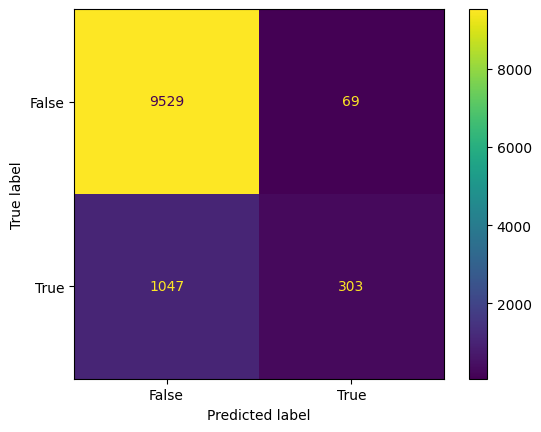

In [63]:
# plot confusion matrix
from sklearn import metrics
actual = y_test
predicted = [1 if item > 0.5 else 0 for item in model.predict_proba(X_test)[:, 1]]
# print(predicted)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [64]:
# !pip install tensorflow

In [66]:
#Alternative Approach: Deep Learning
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(46,)), # was (input_shape=(53,)), now the dow was dropped
    keras.layers.Dense(16, activation=tf.nn.relu),
	  keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=1) # tried epochs 50, but 10 is good enough (nearly converged)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_loss:'+ str(test_loss) )
print('test_acc: '+ str(test_acc) )
# filename = 'nn_model.sav'
# pickle.dump(model, open(filename, 'wb'))

Epoch 1/10


C:\Users\guan\projects\don-t-get-kicked\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62035/62035 ━━━━━━━━━━━━━━━━━━━━ 38s 611us/step - accuracy: 0.8903 - loss: 0.3248
Epoch 2/10
62035/62035 ━━━━━━━━━━━━━━━━━━━━ 86s 1ms/step - accuracy: 0.8985 - loss: 0.3102
Epoch 3/10
62035/62035 ━━━━━━━━━━━━━━━━━━━━ 36s 575us/step - accuracy: 0.8976 - loss: 0.3114
Epoch 4/10
62035/62035 ━━━━━━━━━━━━━━━━━━━━ 40s 645us/step - accuracy: 0.8972 - loss: 0.3124
Epoch 5/10
62035/62035 ━━━━━━━━━━━━━━━━━━━━ 38s 611us/step - accuracy: 0.8981 - loss: 0.3092
Epoch 6/10
62035/62035 ━━━━━━━━━━━━━━━━━━━━ 39s 622us/step - accuracy: 0.8977 - loss: 0.3092
Epoch 7/10
62035/62035 ━━━━━━━━━━━━━━━━━━━━ 38s 605us/step - accuracy: 0.8993 - loss: 0.3052
Epoch 8/10
62035/62035 ━━━━━━━━━━━━━━━━━━━━ 39s 620us/step - accuracy: 0.9010 - loss: 0.3031
Epoch 9/10
62035/62035 ━━━━━━━━━━━━━━━━━━━━ 42s 670us/step - accuracy: 0.9010 - loss: 0.3011
Epoch 10/10
62035/62035 ━━━━━━━━━━━━━━━━━━━━ 39s 623us/step - accuracy: 0.8976 - loss: 0.3085
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9010 - loss: 0.3058
test_